In [71]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [73]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [74]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [75]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [76]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name
print(sex_df.shape)
sex_df.head()

(319795, 2)


,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [77]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [78]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
 'White'])
race_df.head()

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
diabetic_df.head()

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [80]:
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 
                                                            'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
gen_health_df.head()

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


,GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [81]:
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,Yes,No,No,No


In [82]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [83]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Normalization starts here:

In [84]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')
original_df.shape

(319795, 18)

In [85]:
# take a look at the dataset
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Processing numeric features

In [86]:
# age feature
original_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [87]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [88]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40.0,White,No,Yes,Very good,8.0,No,No,No


In [89]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [90]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,0.141621,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,1.525151,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,0.695033,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,1.248445,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,-0.688497,White,No,Yes,Very good,0.628776,No,No,No


In [91]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [92]:
original_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601
2,-0.274603,2.091388,3.281069,0.695033,0.628776
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776


In [93]:
original_df = pd.concat([original_df, df], axis=1, join='inner')

# Dataframe after cleaning:

In [94]:
result_df = original_df
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
pd.set_option('display.max_columns', None)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
result_df.isnull().sum()

BMI                               0
PhysicalHealth                    0
MentalHealth                      0
AgeCategory                       0
SleepTime                         0
HeartDisease                      0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
DiffWalking                       0
PhysicalActivity                  0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
Female                            0
Male                              0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
Diabetic(No)                      0
Diabetic(Yes)                     0
GenHealth(Excellent)              0
GenHealth(Fair)                   0
GenHealth(Good)                   0
GenHealth(Poor)             

# Correlation

<AxesSubplot:>

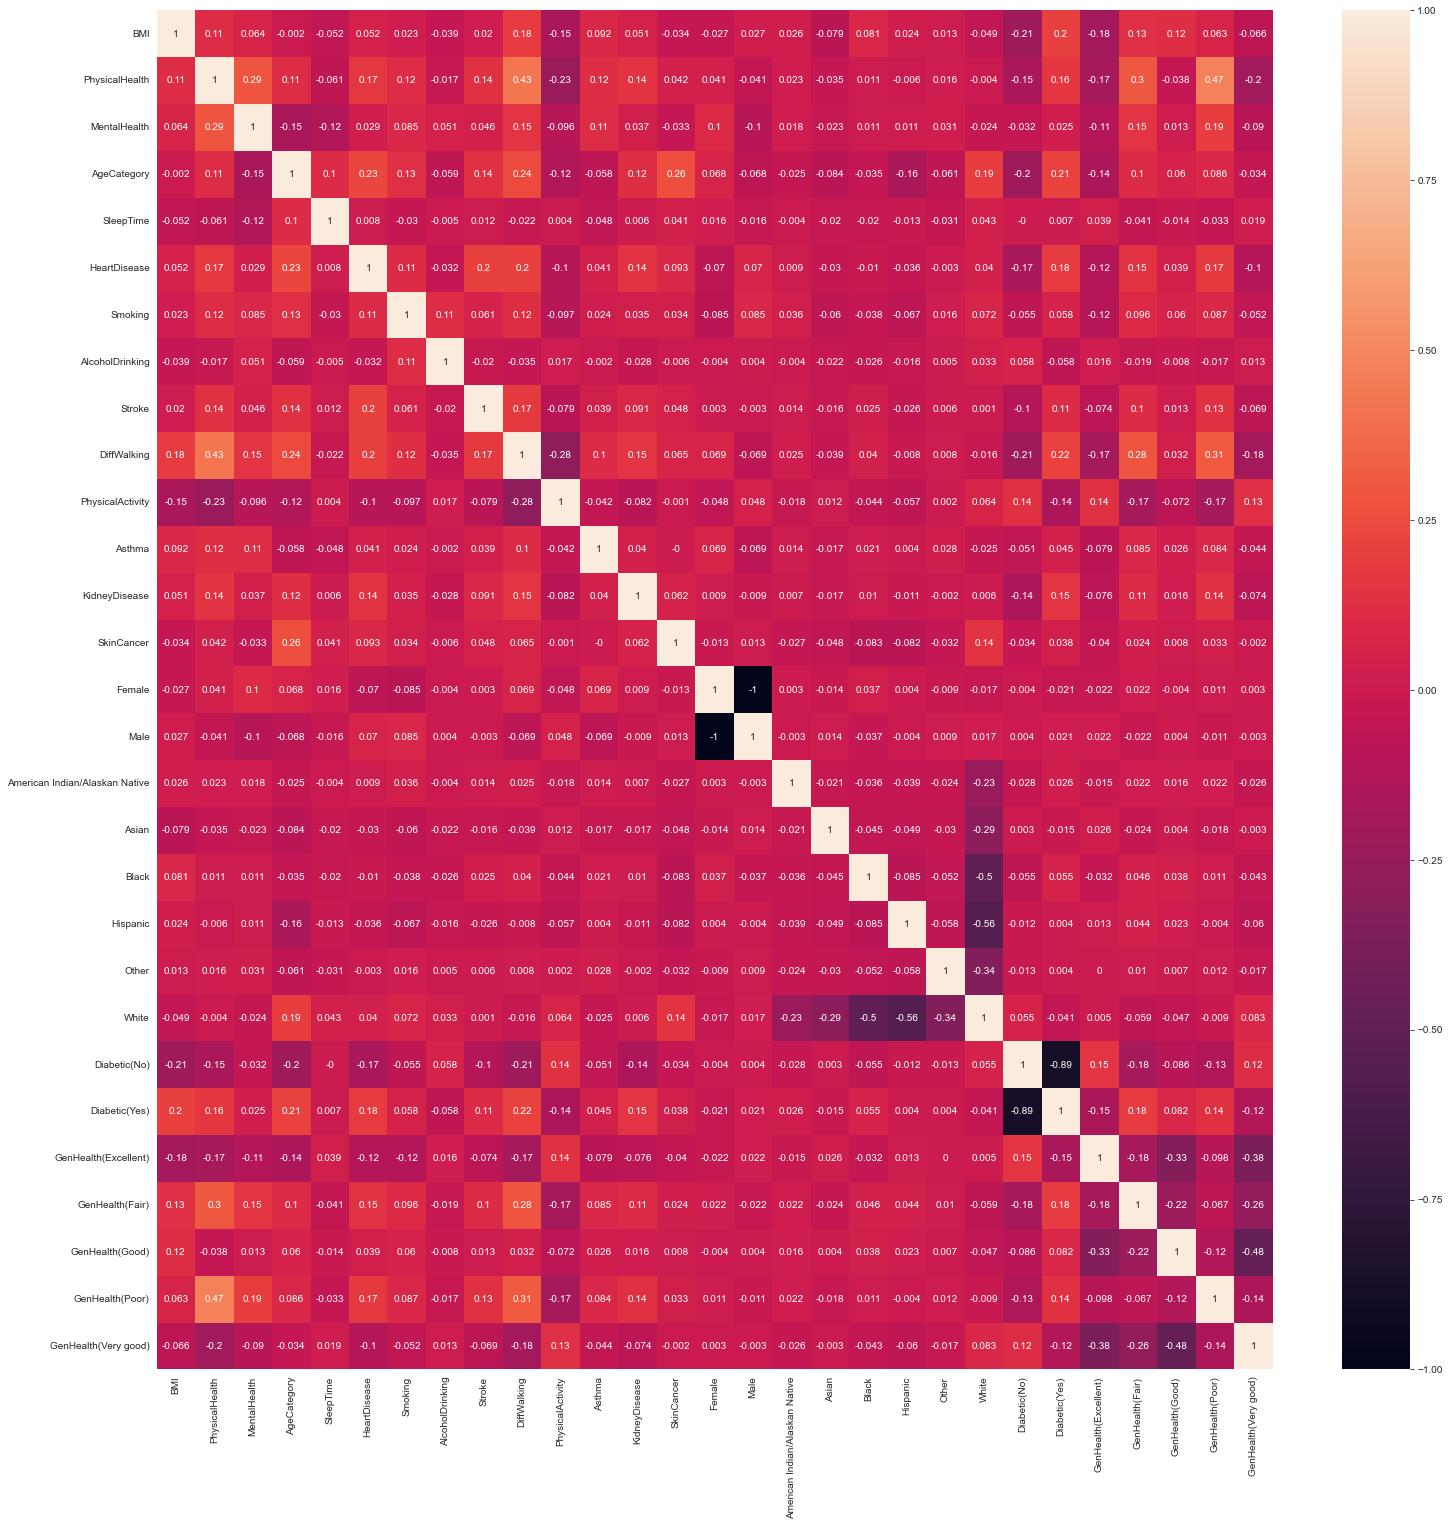

In [98]:
correlation = result_df.corr().round(3)
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

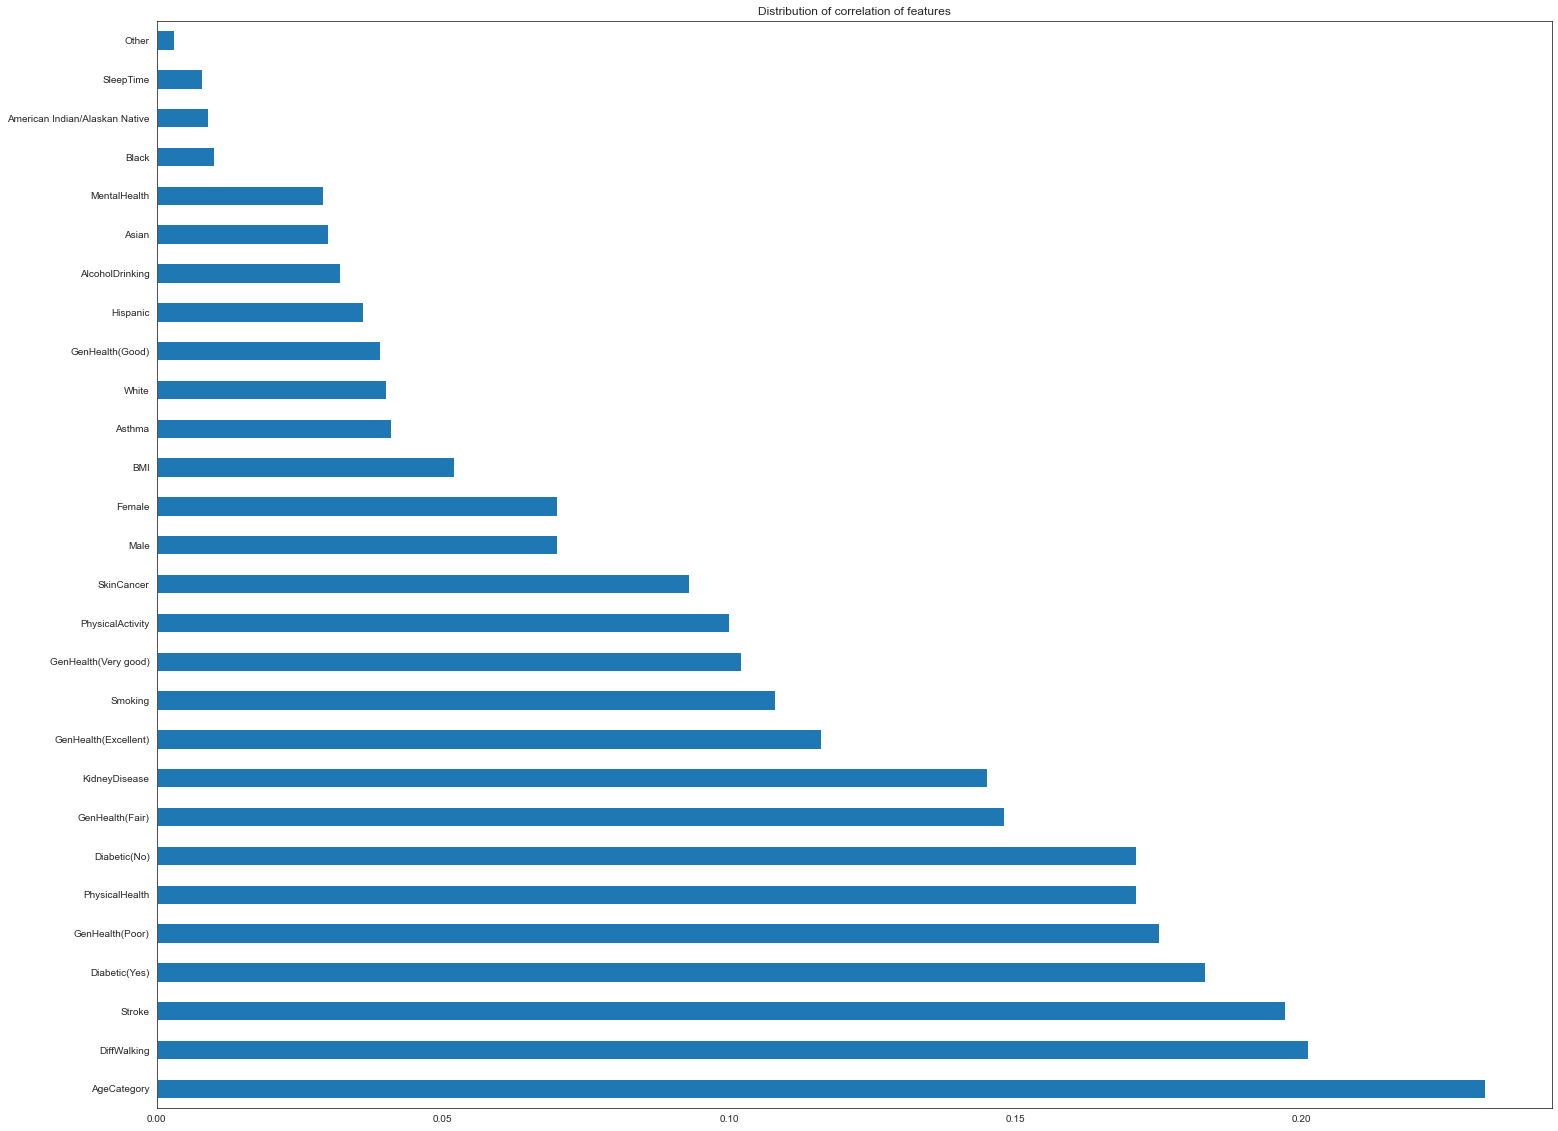

In [99]:
corr_result = pd.DataFrame(correlation.loc["HeartDisease"])
corr_result = abs(corr_result.drop(["HeartDisease"]))
corr_result = corr_result.sort_values("HeartDisease", ascending = False)
sns.set_style('white')
sns.set_palette('tab10')
plt.figure(figsize = (25,20))
plt.title('Distribution of correlation of features')
abs(corr_result['HeartDisease']).plot.barh()
plt.show()

In [100]:
corr_result

,HeartDisease
AgeCategory,0.232
DiffWalking,0.201
Stroke,0.197
Diabetic(Yes),0.183
GenHealth(Poor),0.175
PhysicalHealth,0.171
Diabetic(No),0.171
GenHealth(Fair),0.148
KidneyDisease,0.145
GenHealth(Excellent),0.116
